In [19]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import requests
from bs4 import BeautifulSoup
import warnings
from tqdm.auto import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [20]:
# Webscrapping Wikipedia table to get the IBEX 35 components
page = requests.get("https://en.wikipedia.org/wiki/IBEX_35")
soup = BeautifulSoup(page.text, 'html.parser') 
table = soup.find('table',id='components',class_="wikitable sortable")

In [21]:
# Convert html table to dataframe
wiki = pd.read_html(str(table))
wiki = pd.concat(wiki)
wiki.head(40)

,Ticker,Company,Sector
0,ACS.MC,ACS,Construction
1,ACX.MC,Acerinox,Steel
2,AENA.MC,Aena,Aviation
3,AMS.MC,Amadeus IT Group,Tourism
4,ANA.MC,Acciona,Construction
5,ANE.MC,Acciona Energía,Energy
6,BBVA.MC,BBVA,Financial Services
7,BKT.MC,Bankinter,Financial Services
8,CABK.MC,CaixaBank,Financial Services
9,CLNX.MC,Cellnex Telecom,Telecommunications


In [36]:
# Get the data for the stock ^IBEX
index_list = wiki['Ticker'].tolist()
index_list.append('^IBEX')

In [37]:
# Save all the historical data
for stock in tqdm(index_list):
    data = yf.download(stock, progress=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

  0%|          | 0/36 [00:00<?, ?it/s]

In [38]:
# Configuration of different parameters of the notebook
ticker = 'BBVA.MC'
year = '2024'

In [39]:
# Check DataFrame
stock_index = pd.read_csv(f"../input/{ticker}.csv",index_col="Date",parse_dates=True)
stock_index.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,13.690602,13.757854,13.594527,13.623349,4.571858,8244257
2000-01-04,13.450416,13.536882,13.219837,13.267874,4.452563,8522096
2000-01-05,13.142977,13.210230,12.912399,12.970044,4.352615,12159826
2000-01-06,12.970044,12.970044,12.970044,12.970044,4.352615,0
2000-01-07,13.248659,13.248659,12.998866,13.133370,4.407423,62261944
2000-01-10,13.277482,13.277482,12.902791,12.922006,4.336493,58740351
2000-01-11,12.873969,12.893184,12.537709,12.662605,4.249441,6761292
2000-01-12,12.643391,12.643391,12.393597,12.518494,4.235559,8266754
2000-01-13,12.489672,12.537709,12.105374,12.211056,4.131540,9372669


In [40]:
# Check DataFrame tail
stock_index.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-04,9.358,9.454,9.350,9.414,9.414,7263255
2024-03-05,9.416,9.498,9.394,9.488,9.488,7959209
2024-03-06,9.470,9.720,9.466,9.662,9.662,12860453
2024-03-07,9.638,9.868,9.638,9.848,9.848,17127158
2024-03-08,9.872,10.040,9.862,9.898,9.898,11939752
2024-03-11,9.860,9.974,9.830,9.936,9.936,11517140
2024-03-12,9.952,10.220,9.952,10.195,10.195,14800925
2024-03-13,10.175,10.355,10.170,10.270,10.270,14889385
2024-03-14,10.275,10.320,10.175,10.190,10.190,11590222


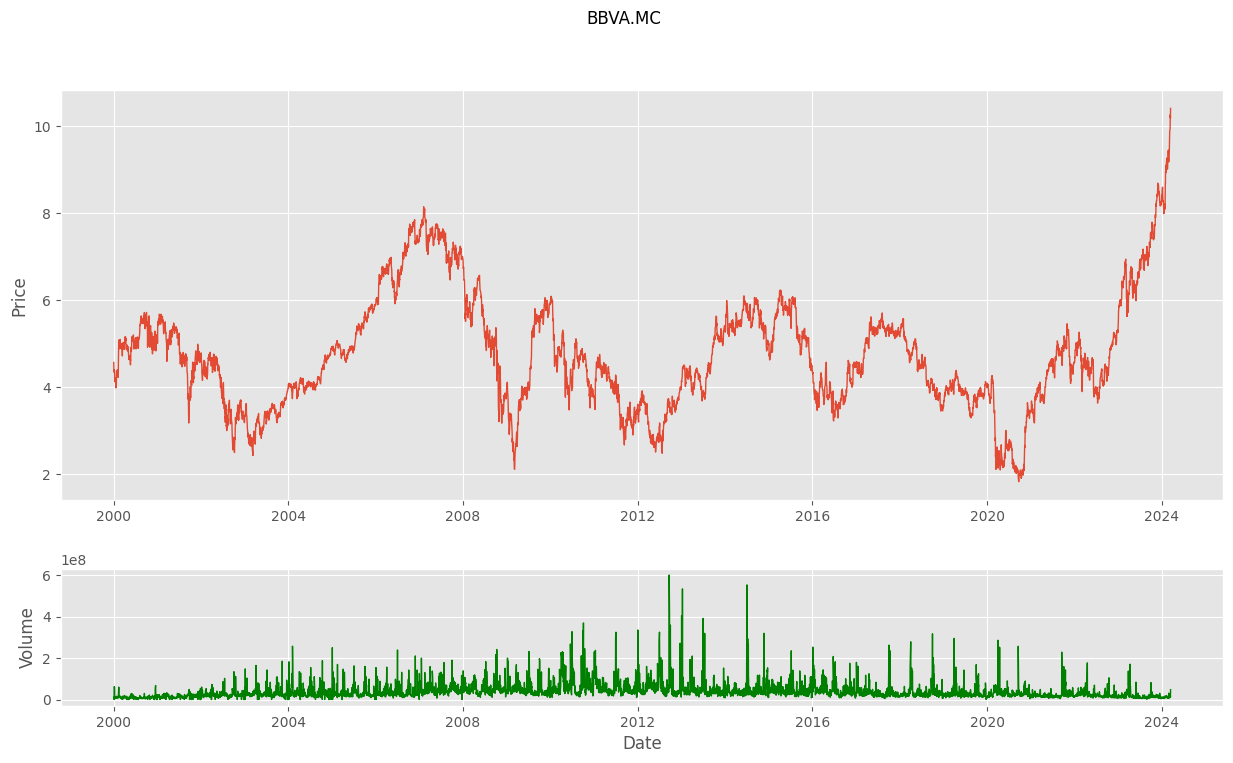

In [41]:
# Plot the adjusted close price of the ^IBEX
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_index['Adj Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_index['Volume'],linewidth=1,color='g')

plt.show()

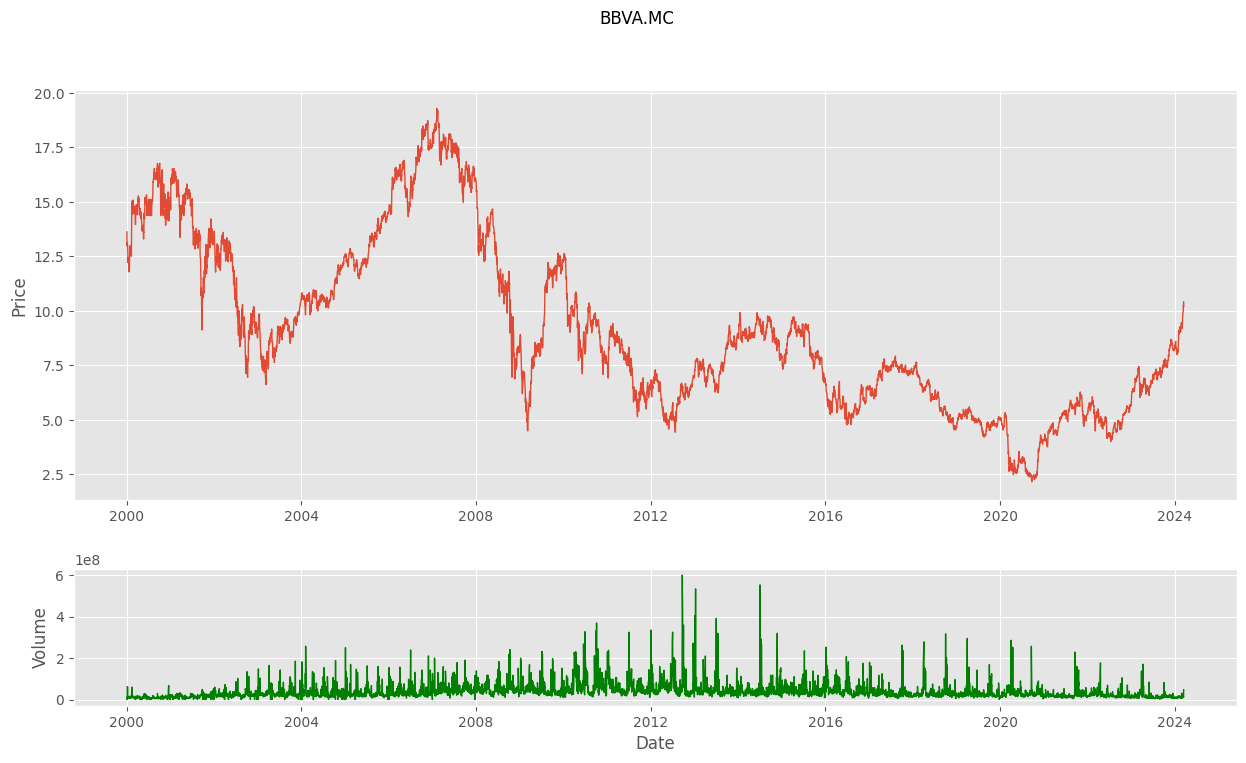

In [42]:
# Plot the close price of the ^IBEX
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_index['Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_index['Volume'],linewidth=1,color='g')

plt.show()

In [43]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_index.index,y=stock_index['Adj Close'],mode="lines",name=f"{ticker}"),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_index.index,y=stock_index['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [44]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_index.index,y=stock_index['Close'],mode="lines",name=f"{ticker}"),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_index.index,y=stock_index['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [45]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
stock_index['MMA20'] = stock_index['Adj Close'].loc[year].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=stock_index["Adj Close"].loc[year], window=20, window_dev=2)

# Bollinger Bands
stock_index['BB_Upper'] = indicator_bb.bollinger_hband()
stock_index['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=stock_index["Adj Close"].loc[year], window=14)

# RSI
stock_index['RSI'] = indicator_rsi.rsi()

# Daily Return
stock_index['Daily_Return'] = daily_return(stock_index["Adj Close"].loc[year])

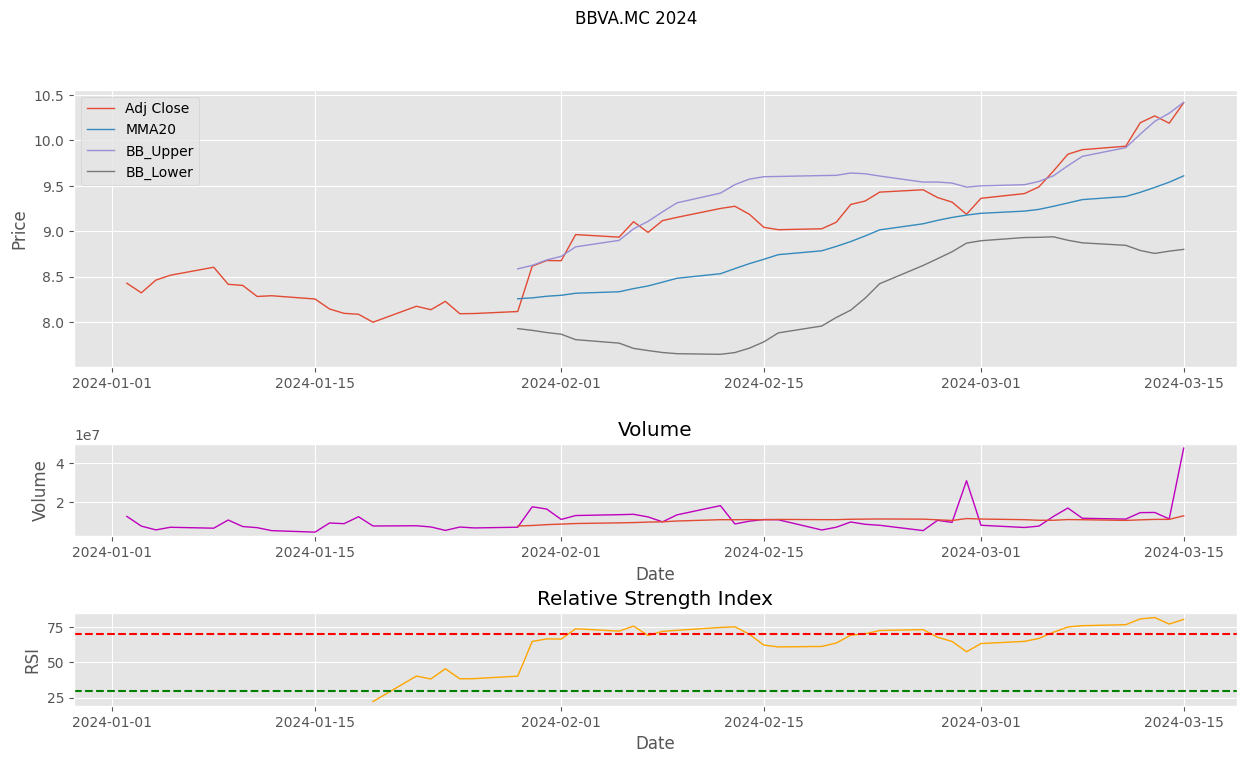

In [46]:
# Plot the adjusted close price of the ^IBEX for year
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8),sharex=True)

# Graph 0
fig.suptitle(f"{ticker} {year}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_index['Adj Close'].loc[year],linewidth=1)
axs[0].plot(stock_index['MMA20'],linewidth=1) 
axs[0].plot(stock_index['BB_Upper'],linewidth=1)
axs[0].plot(stock_index['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])
axs[0].tick_params(labelbottom=True)

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(stock_index['Volume'].loc[year],linewidth=1,color='m')
axs[1].plot(stock_index['Volume'].loc[year].rolling(20).mean(),linewidth=1) #Volume 20 MMA
axs[1].tick_params(labelbottom=True)

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_ylabel("RSI")
axs[2].set_xlabel("Date")
axs[2].plot(stock_index['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [47]:
# Plot the adjusted close price of the ^IBEX for year
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':2,'colspan':1}],[None],[{'rowspan':1,'colspan':1}],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_index['Adj Close'].loc[year].index,y=stock_index['Adj Close'].loc[year],mode="lines",name=f'{ticker}'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_index['BB_Lower'].loc[year].index,y=stock_index['BB_Lower'].loc[year],mode="lines",name='BB_Lower'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_index['BB_Upper'].loc[year].index,y=stock_index['BB_Upper'].loc[year],mode="lines",name='BB_Upper'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_index['MMA20'].loc[year].index,y=stock_index['MMA20'].loc[year],mode="lines",name='MMA20'),row=1,col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (3,1)
fig.add_trace(go.Scatter(x=stock_index['Volume'].loc[year].index,y=stock_index['Volume'].loc[year],mode="lines",name='Volume'),row=3, col=1)
fig.add_trace(go.Scatter(x=stock_index['Volume'].loc[year].index,y=stock_index['Volume'].loc[year].rolling(20).mean(),mode="lines",name='MMA20'),row=3,col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_index['RSI'].loc[year].index,y=stock_index['RSI'].loc[year],mode="lines",name='RSI'),row=4, col=1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green",row=4,col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="red",row=4,col=1)
fig.update_yaxes(title_text="RSI", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker} {year}")

fig.show()

In [48]:
stock_index.tail(10)

,Open,High,Low,Close,Adj Close,Volume,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,
2024-03-04,9.358,9.454,9.350,9.414,9.414,7263255,9.22070,9.511804,8.929596,64.973713,0.555427
2024-03-05,9.416,9.498,9.394,9.488,9.488,7959209,9.23990,9.547849,8.931951,67.093468,0.786067
2024-03-06,9.470,9.720,9.466,9.662,9.662,12860453,9.27370,9.609860,8.937540,71.466183,1.833893
2024-03-07,9.638,9.868,9.638,9.848,9.848,17127158,9.31030,9.720953,8.899647,75.251985,1.925066
2024-03-08,9.872,10.040,9.862,9.898,9.898,11939752,9.34760,9.824189,8.871011,76.167390,0.507719
2024-03-11,9.860,9.974,9.830,9.936,9.936,11517140,9.38190,9.920202,8.843598,76.867699,0.383917
2024-03-12,9.952,10.220,9.952,10.195,10.195,14800925,9.42795,10.069186,8.786713,80.971777,2.606681
2024-03-13,10.175,10.355,10.170,10.270,10.270,14889385,9.48215,10.209842,8.754458,81.969382,0.735662
2024-03-14,10.275,10.320,10.175,10.190,10.190,11590222,9.53955,10.299695,8.779405,77.313225,-0.778976


  0%|          | 0/36 [00:00<?, ?it/s]

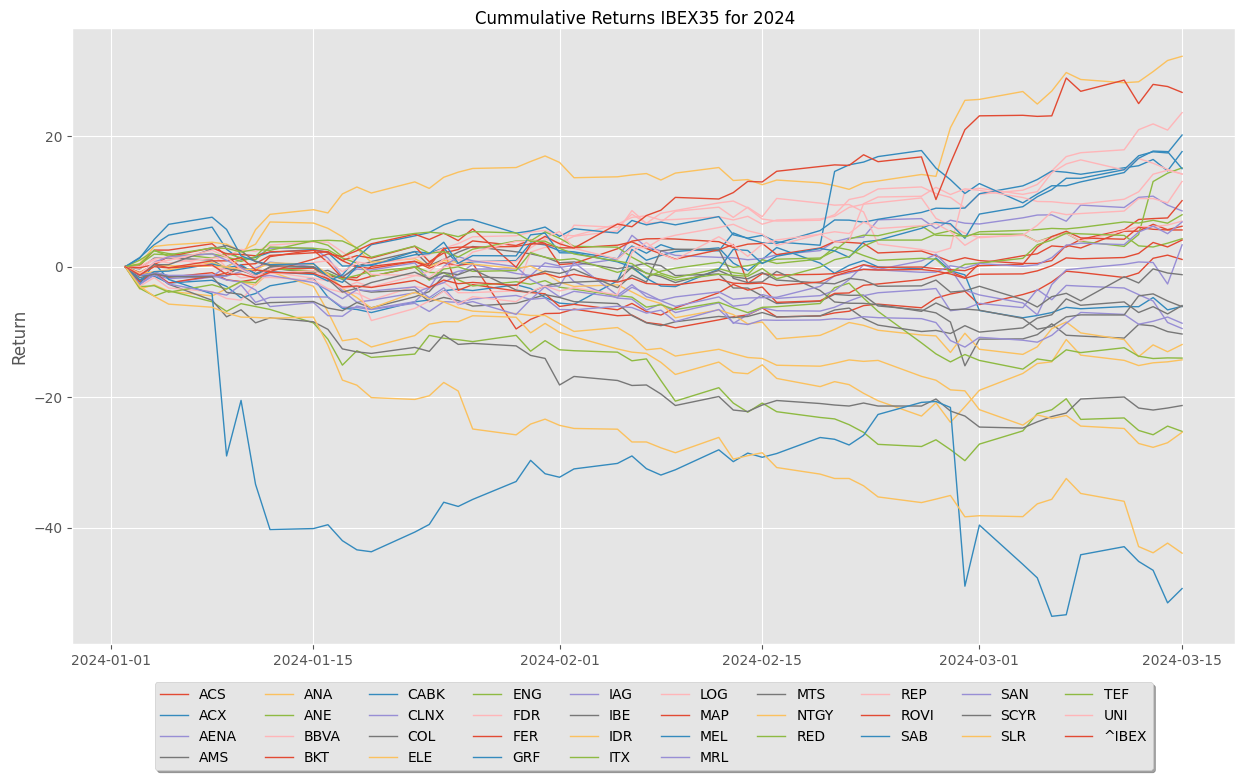

In [49]:
# Plot Cummulative Returns ^IBEX for year
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle(f"Cummulative Returns IBEX35 for {year}")
axs.set_ylabel('Return')
labels = []

# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    axs.plot(df['Cummulative_Return'].loc[year],linewidth=1)
    labels.append(stock.split('.')[0])

# Shrink current axis's height by 10% on the bottom
box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height])

# Put a legend below current axis
axs.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=10)

plt.show()

In [50]:
# Plotly
fig = make_subplots()

# Graph (1,1)
# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    fig.add_trace(go.Scatter(x=df['Cummulative_Return'].loc[year].index,y=df['Cummulative_Return'].loc[year],mode="lines",name=stock.split('.')[0]),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Return", row=1, col=1)

fig.update_layout(height=800, width=1300,showlegend=True,title=f"Cummulative Returns IBEX35 for {year}")

fig.show()

  0%|          | 0/36 [00:00<?, ?it/s]

In [51]:
# Create also table of cummulative returns
list = []

for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),stock.split('.csv')[0],df["Cummulative_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Ticker','Cummulative_Return'])
cum = wiki[['Ticker','Company']].merge(cum,on='Ticker')
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False)


  0%|          | 0/36 [00:00<?, ?it/s]

,Ticker,Company,Date,Cummulative_Return
0,IDR.MC,Indra,2024-03-15,32.244325
1,ROVI.MC,Laboratorios Rovi [es],2024-03-15,26.715690
2,BBVA.MC,BBVA,2024-03-15,23.605512
3,SAB.MC,Banco Sabadell,2024-03-15,20.183090
4,CABK.MC,CaixaBank,2024-03-15,17.642445
5,ITX.MC,Inditex,2024-03-15,15.146871
6,MEL.MC,Meliá Hotels,2024-03-15,15.021094
7,REP.MC,Repsol,2024-03-15,14.213843
8,FDR.MC,Fluidra,2024-03-15,14.196900
9,UNI.MC,Unicaja,2024-03-15,13.067254
